In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset

merged_data = pd.merge(city_data,ride_data, on="city")

# Display the data table for preview
merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [13]:
new_data = merged_data.set_index("city")

new_data.head()

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [14]:
urban_data = new_data.loc[new_data["type"] == "Urban", :]
rural_data = new_data.loc[new_data["type"] == "Rural", :]
suburban_data = new_data.loc[new_data["type"] == "Suburban", :]

city_grouped = merged_data.groupby(["type","city"])

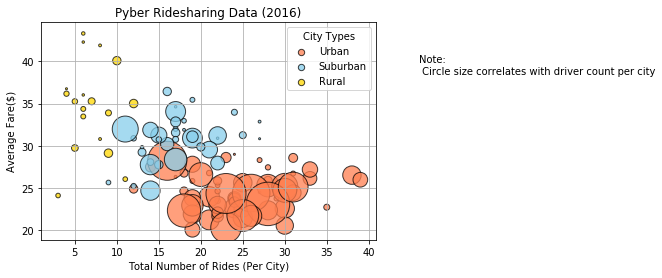

In [31]:
# Obtain the x and y coordinates for each of the three city types

#Urban Data plots
urban_city_grouped = urban_data.groupby(["city"])
urban_total_rides_per_city = (urban_city_grouped)["ride_id"].count()
urban_avg_fare = urban_city_grouped["fare"].mean()

usum_fare = urban_city_grouped["fare"].sum()
ulen_fare = len(urban_city_grouped)
s = city_grouped["driver_count"].sum()


ux_axis = urban_total_rides_per_city
uy_axis = urban_avg_fare

#suburban data plots
suburban_city_grouped = suburban_data.groupby(["city"])
suburban_total_rides_per_city = (suburban_city_grouped)["ride_id"].count()
suburban_avg_fare = suburban_city_grouped["fare"].mean()

ssum_fare = suburban_city_grouped["fare"].sum()
slen_fare = len(suburban_city_grouped)



sx_axis = suburban_total_rides_per_city
sy_axis = suburban_avg_fare

#rural data plots
rural_city_grouped = rural_data.groupby(["city"])
rural_total_rides_per_city = (rural_city_grouped)["ride_id"].count()
rural_avg_fare = rural_city_grouped["fare"].mean()

rsum_fare = suburban_city_grouped["fare"].sum()
rlen_fare = len(suburban_city_grouped)



rx_axis = rural_total_rides_per_city
ry_axis = rural_avg_fare


fig = plt.figure()

plt.scatter(ux_axis, uy_axis, marker="o", color=['coral'], edgecolors="black",
            s=s, alpha=0.75, label="Urban")
plt.scatter(sx_axis, sy_axis, marker="o", color=['skyblue'], edgecolors="black",
            s=s, alpha=0.75, label="Suburban")
plt.scatter(rx_axis, ry_axis, marker="o", color=['gold'], edgecolors="black",
            s=s, alpha=0.75, label="Rural")


plt.title("Pyber Ridesharing Data (2016)")
plt.ylabel("Average Fare($)")
plt.xlabel("Total Number of Rides (Per City)")
lgnd = plt.legend(title="City Types",loc="upper right")
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes= [40]
lgnd.legendHandles[2]._sizes=[40]

plt.grid()

note = "Note:\n Circle size correlates with driver count per city"
plt.gcf().text(1, .7, note, fontsize=10)
fig.savefig("../matplotlib/images/bubbleplot.png")

## Total Fares by City Type

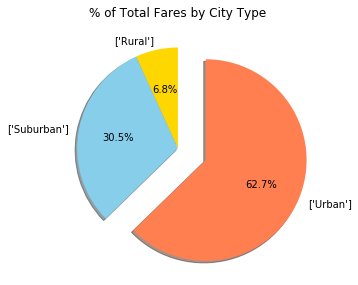

In [16]:
# Calculate Type Percents
type_grouped = merged_data.groupby(["type"])
type_totals = merged_data["type"].value_counts()
fare_totals = type_grouped["fare"].sum()
fare_percents = (fare_totals/len(merged_data["type"]))*100


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total Fares by City Type")

fares_labels = type_grouped.type.unique()
x = fare_percents
explode = (0, 0, 0.3)



# Build Pie Chart
plt.pie(x,labels=fares_labels, explode=explode, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totalfaresbycity.png")



## Total Rides by City Type

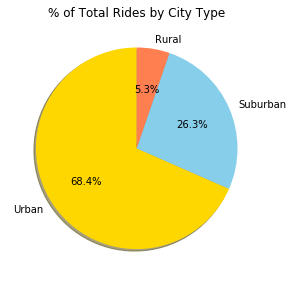

In [17]:
# Calculate Ride Percents
type_grouped = merged_data.groupby(["type"])
type_totals = merged_data["type"].value_counts()
rides_percents = (type_totals/len(merged_data["type"]))*100


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total Rides by City Type")

rides_labels = merged_data.type.unique()
x = rides_percents



# Build Pie Chart
plt.pie(x,labels=rides_labels, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totalridesbycity.png")

# Build Pie Chart

# Save Figure


In [18]:
# Show Figure
plt.show()

## Total Drivers by City Type

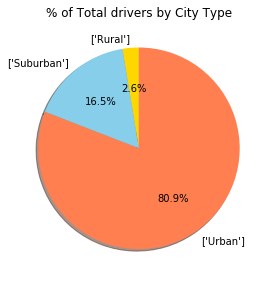

In [19]:
# Calculate Driver Percents
drop_dupes = merged_data.drop_duplicates(["city"])
type_grouped = drop_dupes.groupby(["type"])
driver_totals = type_grouped["driver_count"].sum()
driver_percents = ((driver_totals/drop_dupes["driver_count"].sum()*100))


fig = plt.figure(figsize=(7,6))
ax = fig.add_axes((0,0,.5,1))
ax.set_title("% of Total drivers by City Type")

drivers_labels = type_grouped.type.unique()
x = driver_percents



# Build Pie Chart
plt.pie(x,labels=drivers_labels, colors=['gold','skyblue','coral'],autopct="%1.1f%%", shadow=True, 
        startangle=90)
# Save Figure
fig.savefig("../matplotlib/images/totaldriversbycity.png")

# Build Pie Charts

# Save Figure


In [20]:
# Show Figure
plt.show()

In [ ]:
# observable trends 

#1 Most Pyber drivers operate in urban city types
#2 The average fare cost tends to be higher in rural cities than in urban and suburban areas 
#3 Although fares cost more on average in rural areas, pyber recieves the least amount of revenue from these 
#    areas due to the lower number of rides given 